# Week 11 : Case Study 7 - Bimal H M

## Supervised Learning - IRIS Dataset

### STEP 1 : Importing all Necessary Libraries in to Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 : Read the dataset to the python environment

In [2]:
iris = pd.read_excel('iris.xls')

#### A) Displaying First few Rows

In [3]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Q2 : Do necessary pre-processing steps.

### A) Check the basic details of the dataset

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### B) Checking for summary statistics

In [5]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### C) Filling all the missing values present in the dataset

#### C_1 : Checking Datatypes

In [6]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

#### C_2 : Checking for Null Values

In [7]:
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### C_3 : Ploting histogram of Dataset and filling missing values of all 3 columns(SL,SW,PL)

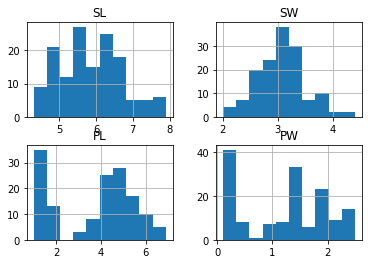

In [8]:
iris.hist()
plt.show()

Since data is skewed missing values can be replaced by Median of respective columns

In [9]:
for i in ['SL','SW','PL']:
    iris[i]=iris[i].fillna(iris[i].median())

In [10]:
iris.isna().sum()      # Checking for nullvalues again

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### D) Checking and handling outliers in dataset

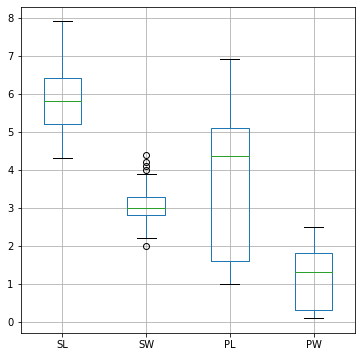

In [11]:
BoxP = iris.select_dtypes(include=float)
BoxP.boxplot(figsize = (6,6))
plt.show()

Outliers present only in SW column

#### D_1 : Handling outliers from - SW

In [12]:
# Finding Q!, Q3, IQR, Lower and Upper limits to deteermine outliers

# Q1,Q3, IQR
Q1 = np.percentile(iris['SW'],25,interpolation='midpoint')
Q3 = np.percentile(iris['SW'],75,interpolation='midpoint')
IQR = Q3-Q1
print(' Q1  = ',Q1,'\n Q3  = ',Q3, '\n IQR = ',round(IQR,3))

#Outleir limits
LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print('Lower limit = ',round(LL,3),'\nUpper limit = ',round(UL,3))

 Q1  =  2.8 
 Q3  =  3.25 
 IQR =  0.45
Lower limit =  2.125 
Upper limit =  3.925


In [13]:
#Finding Corresponding indexnumbers
ind = iris.loc[(iris['SW']>UL) | (iris['SW']<LL)].index

#Removing these index values
iris.drop(ind,inplace=True)

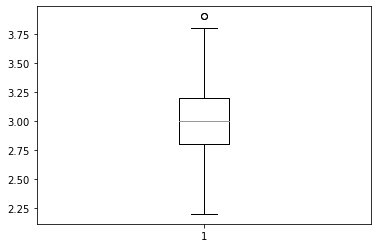

In [14]:
plt.boxplot(iris.SW)
plt.show()

### E) Normalizing dataset w.r.t Classification

In [15]:
y = iris.Classification
x = iris.drop(['Classification'],axis=1)

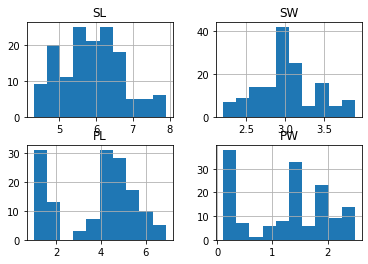

In [16]:
x.hist()
plt.show()

In [17]:
from sklearn import preprocessing
x = preprocessing.normalize(x)
x = pd.DataFrame(x)

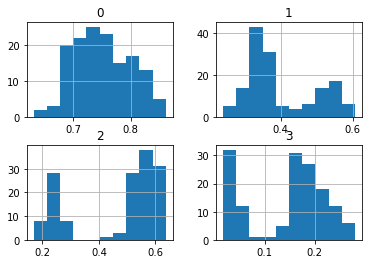

In [18]:
x.hist()
plt.show()

## Q3 : Find out which classification model gives the best result to predict iris species. (also do random forest algorithm) 

### Parting dataset in to Test and Train and importing necessery libraries

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### A) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

print('Accuracy score         = ',round(accuracy_score(y_test,y_pred),3),'\n\nConfusion matrix       = \n\n',confusion_matrix(y_test,y_pred),'\n\nClassification report  = \n\n',classification_report(y_test,y_pred))

Accuracy score         =  0.828 

Confusion matrix       = 

 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]] 

Classification report  = 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



### B) SVM - Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

print('Accuracy score         = ',round(accuracy_score(y_test,y_pred),3),'\n\nConfusion matrix       = \n\n',confusion_matrix(y_test,y_pred),'\n\nClassification report  = \n\n',classification_report(y_test,y_pred))

Accuracy score         =  0.966 

Confusion matrix       = 

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]] 

Classification report  = 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



### C) Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

print('Accuracy score         = ',round(accuracy_score(y_test,y_pred),3),'\n\nConfusion matrix       = \n\n',confusion_matrix(y_test,y_pred),'\n\nClassification report  = \n\n',classification_report(y_test,y_pred))

Accuracy score         =  0.931 

Confusion matrix       = 

 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]] 

Classification report  = 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



### D) KNN - K Nearest Neighbors

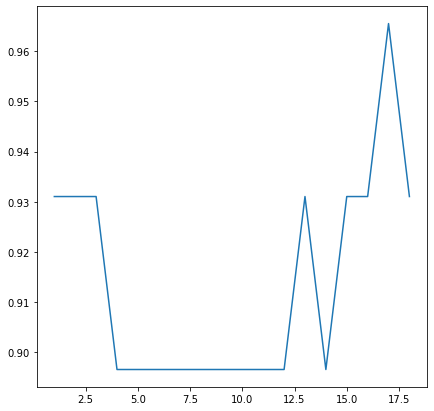

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#Optimum K-value Finding

Lis1 = []
N = np.arange(1,19)
for k in N:
    Mink = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Mink.fit(x_train,y_train)
    y_pred = Mink.predict(x_test)
    a = accuracy_score(y_pred,y_test)
    Lis1.append(a)
    
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,19),Lis1)
plt.show()

we will take k = 17 as optimum value

In [24]:
Mink = KNeighborsClassifier(n_neighbors=17,metric='minkowski')
Mink.fit(x_train,y_train)
y_pred = Mink.predict(x_test)

print('Accuracy score         = ',round(accuracy_score(y_test,y_pred),3),'\n\nConfusion matrix       = \n\n',confusion_matrix(y_test,y_pred),'\n\nClassification report  = \n\n',classification_report(y_test,y_pred))

Accuracy score         =  0.966 

Confusion matrix       = 

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]] 

Classification report  = 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



### E) Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

print('Accuracy score         = ',round(accuracy_score(y_test,y_pred),3),'\n\nConfusion matrix       = \n\n',confusion_matrix(y_test,y_pred),'\n\nClassification report  = \n\n',classification_report(y_test,y_pred))

Accuracy score         =  0.966 

Confusion matrix       = 

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]] 

Classification report  = 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



##### SVM, KNN, Random Forest models show high accuracy